# Identifying the baseline

I am using a very straighforward CNN model to identify the baseline to work with. This is a basic regression CNN which is trained with the help of the labelled data which corresponds to each image. This approach is not expected to give a very high accuracy, but should provide a decent baseline to compare future, more complicated models with.

In [1]:
import numpy as np
import torch
import torch.nn as nn
from baselineCNN import CNNBaseline
from baselineCNN import DigitSumDataset
from torchvision import transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/yashassb/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


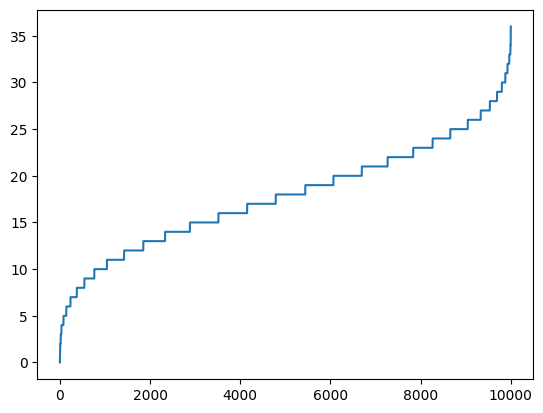

In [2]:
train1 = np.load("data0.npy")
lab1 = np.load("lab0.npy")

plt.plot(range(len(lab1)), sorted(lab1))
plt.show()

In [3]:
# Parameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Data transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Dataset and DataLoader
dataset = DigitSumDataset(transform=transform)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for images, labels in data_loader:
    print(images.shape)
    break

model = CNNBaseline()  # Output a single value for the sum
criterion = nn.MSELoss()  # Use MSE for regression task
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in data_loader:
        images, labels = images.to(device).float(), labels.to(device).float()  # Add channel dim for grayscale

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(data_loader):.4f}")

print("Training complete!")

# Example inference
def infer_sum(image):
    model.eval()
    with torch.no_grad():
        image = transform(image).unsqueeze(0).unsqueeze(0).to(device).float()
        output = model(image)
        predicted_sum = torch.argmax(output, dim=1).item()
        return predicted_sum


torch.Size([64, 1, 40, 168])


/home/yashassb/env/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/yashassb/env/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Loss: 36.3408
Epoch [2/10], Loss: 34.0385
Epoch [3/10], Loss: 33.9542
Epoch [4/10], Loss: 34.1012
Epoch [5/10], Loss: 34.0532
Epoch [6/10], Loss: 33.8615
Epoch [7/10], Loss: 33.8968
Epoch [8/10], Loss: 33.9392
Epoch [9/10], Loss: 34.1390
Epoch [10/10], Loss: 33.8133
Training complete!
